In [ ]:
#if needed 
#from __future__ import print_function

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('dengue_features_train.csv')
labels = pd.read_csv('dengue_labels_train.csv')
test = pd.read_csv('dengue_features_test.csv')

In [3]:
df.fillna(method='ffill', inplace=True)

In [4]:
df['week_start_date']=pd.to_datetime(df['week_start_date'])

In [5]:
df['date_shifted_2wk'] = df['week_start_date'].apply(lambda x: x - pd.DateOffset(weeks=2))
df['date_shifted_1wk'] = df['week_start_date'].apply(lambda x: x - pd.DateOffset(weeks=1))

In [6]:
df=pd.merge(df, labels, on=['city', 'year', 'weekofyear'])

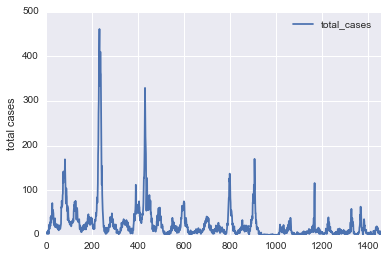

In [11]:
plt.figure()
ax = df[['week_start_date', 'total_cases']].plot()
ax.set_ylabel('total cases')

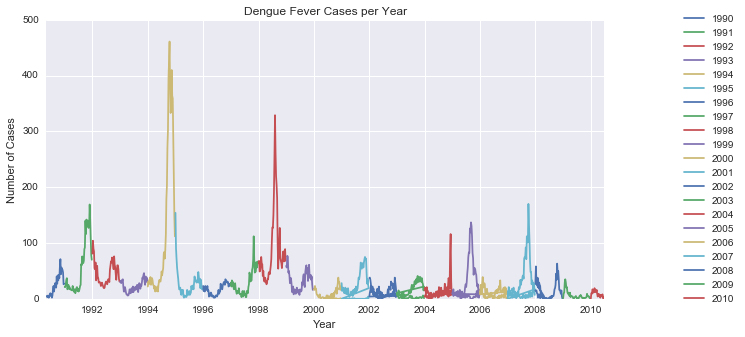

In [13]:
fig,ax = plt.subplots(figsize=(10,5))
for i in np.unique(df.week_start_date.dt.year.values):
    plt.plot(df[df.week_start_date.dt.year==i].week_start_date.T,df[df.week_start_date.dt.year==i].total_cases,label='%d'%(i));
    plt.legend();
    plt.title('Dengue Fever Cases per Year');
    plt.xlabel('Year')
    plt.ylabel('Number of Cases')
#plt.savefig('dengue.png')
    ax.legend(bbox_to_anchor=(1.25, 1.05))

In [16]:
### reset axis
df.index = df['week_start_date']
del df['week_start_date']

#### lag weather data by 2 weeks to account for mosquito’s life cycle - shift all vars or just the climate ones?

#### dengue fever cases per year by location

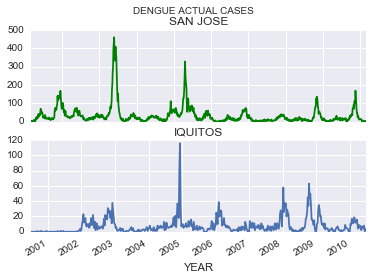

In [55]:
figs, axes = plt.subplots(nrows=2, ncols=1)

ax = df[df['city']=='sj'].total_cases.plot(ax=axes[0], label="San Juan", color='g')
ax.set_title('SAN JOSE')
ax.set_xticklabels([])
ax.set_xlabel("")

# plot iq
ax1 = df[df['city']=='iq'].total_cases.plot(ax=axes[1], label="Iquitos")
ax1.set_title('IQUITOS')
ax1.set_xlabel("YEAR")

plt.suptitle("DENGUE ACTUAL CASES")

In [53]:
pv = pd.pivot_table(df, index=df.index.year, columns=df.city,
                    values='total_cases', aggfunc='sum')

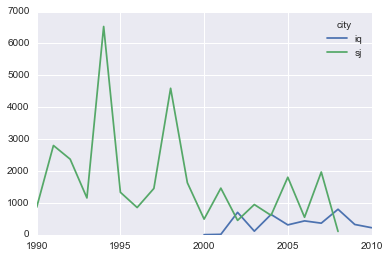

In [54]:
pv.plot()

In [56]:
pv2 = pd.pivot_table(df, index=df.index.month, columns=df.city,
                    values='total_cases', aggfunc='sum')

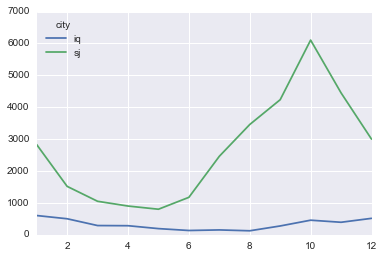

In [57]:
pv2.plot()

In [58]:
pv3 = pd.pivot_table(df, index=df.index.month, columns=df.index.year,
                    values='total_cases', aggfunc='sum')

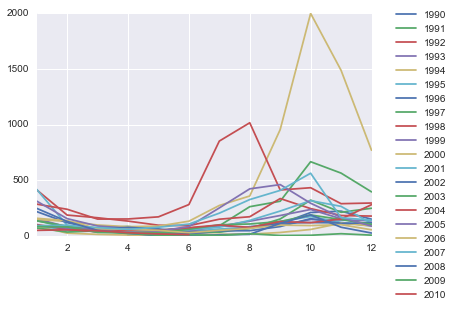

In [59]:
fig = plt.figure()
ax = pv3.plot()

ax.legend(bbox_to_anchor=(1.25, 1.05))

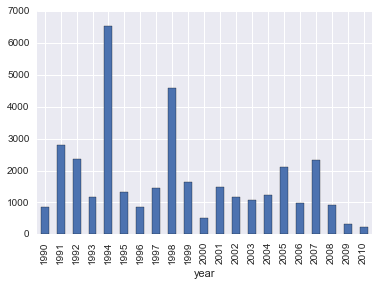

In [69]:
df.groupby(['year']).total_cases.sum().plot(kind='bar')

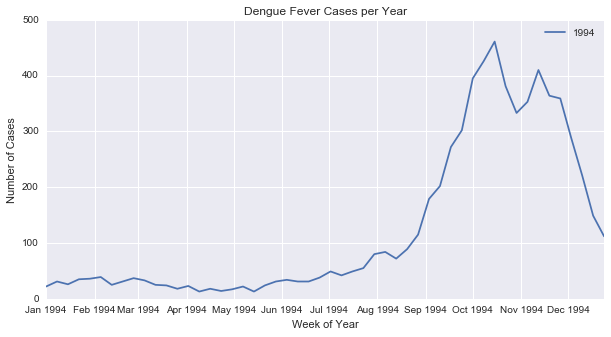

In [88]:
fig,ax = plt.subplots(figsize=(10,5))
for i in np.unique(df.year.values):
    if df[df.index.year==i].total_cases.mean() >= 100:
    #df[df.year==i].total_cases > 850:

        plt.plot(df[df.year==i].total_cases,label='%d'%(i));
        plt.legend();
        plt.title('Dengue Fever Cases per Year');
        plt.xlabel('Week of Year')
        plt.ylabel('Number of Cases')
    

In [97]:
weather_cols=[
 #'city',
 #'week_start_date',
 #'date_shifted_2wk',
 #'date_shifted_1wk',
 'total_cases',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [242]:
precipitation_cols=[
  'city',
 'week_start_date',
 'date_shifted_2wk',
 'date_shifted_1wk',
 'total_cases',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
]

In [243]:
vegetation_cols=[
  'city',
 'week_start_date',
 'date_shifted_2wk',
 'date_shifted_1wk',
 'total_cases',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw'
]

In [248]:
df['ndvi_ne'][0:10]

week_start_date
1990-04-30    0.122600
1990-05-07    0.169900
1990-05-14    0.032250
1990-05-21    0.128633
1990-05-28    0.196200
1990-06-04    0.196200
1990-06-11    0.112900
1990-06-18    0.072500
1990-06-25    0.102450
1990-07-02    0.102450
Name: ndvi_ne, dtype: float64

Although there are several vegetation indices, one of the most widely used is the Normalized Difference Vegetation Index (NDVI). NDVI values range from +1.0 to -1.0. Areas of barren rock, sand, or snow usually show very low NDVI values (for example, 0.1 or less). Sparse vegetation such as shrubs and grasslands or senescing crops may result in moderate NDVI values (approximately 0.2 to 0.5). High NDVI values (approximately 0.6 to 0.9) correspond to dense vegetation such as that found in temperate and tropical forests or crops at their peak growth stage. 

By transforming raw satellite data into NDVI values, researchers can create images and other products that give a rough measure of vegetation type, amount, and condition on land surfaces around the world. NDVI is especially useful for continental- to global-scale vegetation monitoring because it can compensate for changing illumination conditions, surface slope, and viewing angle. That said, NDVI does tend to saturate over dense vegetation and is sensitive to underlying soil color. 

NDVI values can be averaged over time to establish "normal" growing conditions in a region for a given time of year. Further analysis can then characterize the health of vegetation in that place relative to the norm. When analyzed through time, NDVI can reveal where vegetation is thriving and where it is under stress, as well as changes in vegetation due to human activities such as deforestation, natural disturbances such as wild fires, or changes in plants' phenological stage.

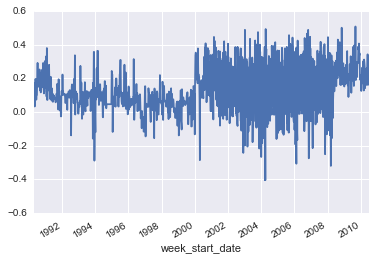

In [107]:
df['ndvi_ne'].plot()

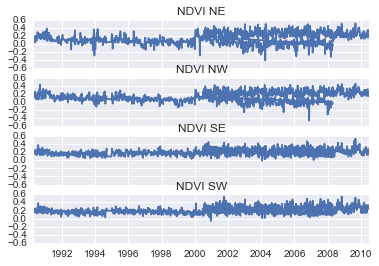

In [90]:
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)
ax1.plot(df['ndvi_ne'])
ax1.set_title('NDVI NE')
ax2.plot(df['ndvi_nw'])
ax2.set_title('NDVI NW')
ax3.plot(df['ndvi_se'])
ax3.set_title('NDVI SE')
ax4.plot(df['ndvi_sw'])
ax4.set_title('NDVI SW')

In [108]:
df['ndvi_ne'].min()

-0.40625

Negative values of NDVI (values approaching -1) correspond to water. Values close to zero (-0.1 to 0.1) generally correspond to barren areas of rock, sand, or snow. Lastly, low, positive values represent shrub and grassland (approximately 0.2 to 0.4), while high values indicate temperate and tropical rainforests (values approaching 1).

In [110]:
df['ndvi_all_directions']=(df['ndvi_ne']+df['ndvi_nw']+df['ndvi_se']+df['ndvi_sw'])/4

In [121]:
df[['ndvi_all_directions','ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw','ndvi_desc']].head()

,ndvi_all_directions,ndvi_se,ndvi_sw,ndvi_ne,ndvi_nw,ndvi_desc
week_start_date,,,,,,
1990-04-30,0.150606,0.198483,0.177617,0.122600,0.103725,rock/sand
1990-05-07,0.157479,0.162357,0.155486,0.169900,0.142175,rock/sand
1990-05-14,0.133315,0.157200,0.170843,0.032250,0.172967,rock/sand
1990-05-21,0.209286,0.227557,0.235886,0.128633,0.245067,shrub/grassland
1990-05-28,0.239235,0.251200,0.247340,0.196200,0.262200,shrub/grassland


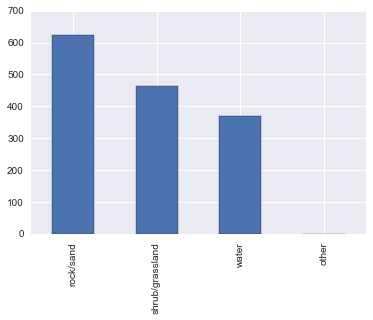

In [123]:
df['ndvi_desc'].value_counts().plot(kind='bar')

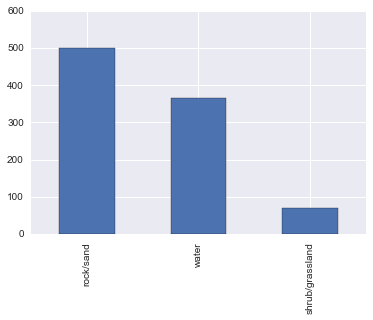

In [129]:
df[df['city']=='sj'].ndvi_desc.value_counts().plot(kind='bar')

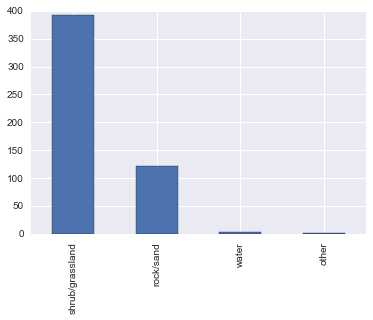

In [130]:
df[df['city']=='iq'].ndvi_desc.value_counts().plot(kind='bar')

In [118]:
def get_ndvi_category(x):
    x=float(x)
    if x < 0.1: return 'water'
    if x >= 0.1 and x <0.2: return 'rock/sand'
    if x >=0.2 and x<0.5 : return 'shrub/grassland'
    if x > 0.6: return 'forest'
    return 'other'

In [119]:
df['ndvi_desc'] = df.ndvi_all_directions.apply(get_ndvi_category)

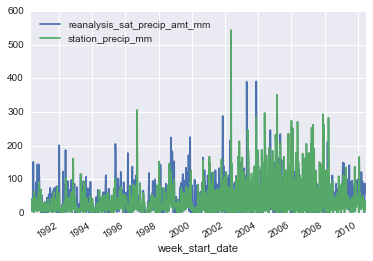

In [132]:
df[['reanalysis_sat_precip_amt_mm','station_precip_mm']].plot()

In [133]:
df.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,date_shifted_2wk,date_shifted_1wk,total_cases,ndvi_all_directions,ndvi_desc
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,25.442857,6.900000,29.4,20.0,16.0,1990-04-16,1990-04-23,4,0.150606,rock/sand
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,26.714286,6.371429,31.7,22.2,8.6,1990-04-23,1990-04-30,5,0.157479,rock/sand
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.714286,6.485714,32.2,22.8,41.4,1990-04-30,1990-05-07,4,0.133315,rock/sand
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,27.471429,6.771429,33.3,23.3,4.0,1990-05-07,1990-05-14,3,0.209286,shrub/grassland
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,28.942857,9.371429,35.0,23.9,5.8,1990-05-14,1990-05-21,6,0.239235,shrub/grassland
